In [21]:
import sys
sys.path.append("..")
import numpy as np

from utils import params
from processing import postprocess
from train import skl_train
import visuals.plot as cplt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.externals import joblib

## Load Training Data 

Train Size: 7776
-- All Labels


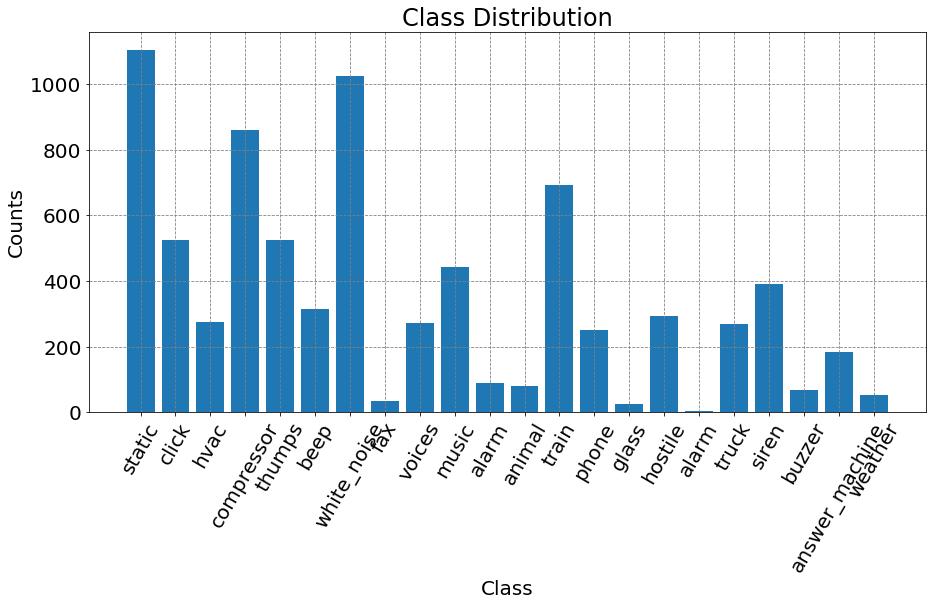

In [30]:
# LOAD DATA FRAME
#dfile = "./output/pandas/embeddings_16bit_train2.pickle"
#dfile = "./output/pandas/embeddings_16bit_hostile_aug_train.pickle"
dfile = "../output/pandas/embeddings_16bit_train_04122018_aug_v2.pickle"
df_train,data = postprocess.load_pd_data(dfile,norm=False,nfeatures=640)

# GET LABELS
labels = df_train['labels'].get_values()

print "Train Size: "+str(len(labels))
print "-- All Labels"
cplt.plot_labels(labels)

## Relabel Training Data 

Class Ratio || Indist.: 0.599794238683, Dist: 0.400205761317
-- Binary Labels


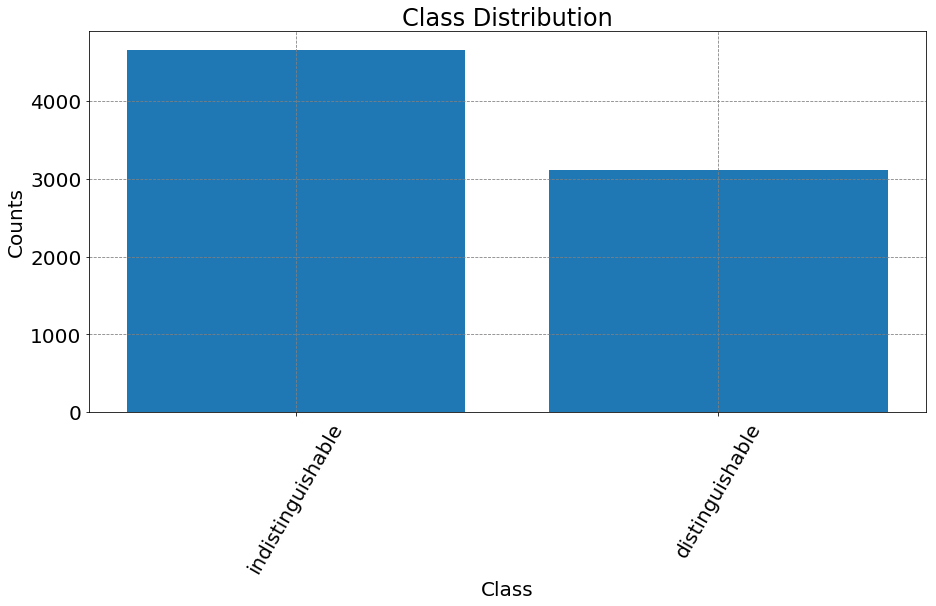

In [31]:
# CREATE BINARY LABELS
orig = set([1,2,3,4,5,6,7,8])
blabels = [0 if x in orig else 1 for x in labels]

# NORAMLIZE DATA
train_mean = np.mean(data,axis=0)
train_std = np.std(data)
X_train = (data-train_mean)/train_std
y_train = blabels

print "Class Ratio || Indist.: "+str(np.count_nonzero(np.array(y_train)==0)/float(len(blabels)))+", Dist: "+str(np.count_nonzero(y_train)/float(len(blabels)))
print "-- Binary Labels"
cplt.plot_labels(blabels,key={0:'indistinguishable',1:'distinguishable'})

## Train and Save Model 

In [32]:
# TRAIN AND VALIDATE MODELS
# MLP
print "-- Training MLP"
clf_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100),
                        batch_size=32)
mlp_metrics = skl_train.train_and_eval(X_train,y_train,clf_mlp)

# XGBOOST
print "-- Training XGBoost"
clf_xgb = xgb.XGBClassifier(max_depth=13,
                            n_estimators=2300,
                            min_child_weight=1,
                            learning_rate=0.04,
                            subsample=0.8,
                            colsample_bytree=0.6,
                            gamma= 2)
xgb_metrics = skl_train.train_and_eval(X_train,y_train,clf_xgb,xgb=True,folds=10)

# RANDOM FOREST
print "-- Training Random Forest"
clf_rf = RandomForestClassifier(n_estimators=2300,
                                max_depth=13)
rf_metrics = skl_train.train_and_eval(X_train,y_train,clf_rf)

-- Training MLP
Fold: 1
Acc: 0.8472400513478819 | Logloss: 0.7152532763091608 | Recall: 0.8205128205128205 | AUC: 0.8428045901279306
Fold: 2
Acc: 0.8575096277278562 | Logloss: 0.8616723918057795 | Recall: 0.7532051282051282 | AUC: 0.8401999945094164
Fold: 3
Acc: 0.8277634961439588 | Logloss: 1.0237332586535015 | Recall: 0.7781350482315113 | AUC: 0.8194743763641497
Fold: 4
Acc: 0.877892030848329 | Logloss: 0.7083913621356406 | Recall: 0.8327974276527331 | AUC: 0.8703601699291502
Fold: 5
Acc: 0.833976833976834 | Logloss: 0.8774583514204476 | Recall: 0.7652733118971061 | AUC: 0.8225508190386818
Fold: 6
Acc: 0.8416988416988417 | Logloss: 0.9138587997926458 | Recall: 0.7459807073954984 | AUC: 0.8257800532685647
Fold: 7
Acc: 0.8442728442728443 | Logloss: 0.9429796162585827 | Recall: 0.8102893890675241 | AUC: 0.8386210893835474
Fold: 8
Acc: 0.8455598455598455 | Logloss: 0.8408898155130368 | Recall: 0.7331189710610932 | AUC: 0.8268599147150961
Fold: 9
Acc: 0.8545688545688546 | Logloss: 0.75011

KeyboardInterrupt: 

In [33]:
# SAVE FILE AND DATA
mfile1 = "../checkpoint/skl/mlp_binary_04122018_aug_v2.sav"
#mfile2 = "../checkpoint/skl/rf_binary_04122018_aug.sav"
mfile3 = "../checkpoint/skl/xgb_binary_04122018_aug_v2.sav"
sfile = "../checkpoint/skl/train_stats_binary_04122018_aug_v2.npz"

joblib.dump(clf_mlp, mfile1)
joblib.dump(clf_rf, mfile2)
joblib.dump(clf_xgb, mfile3)
np.savez_compressed(sfile,train_mean=train_mean,train_std=train_std,breakdown=list(orig))

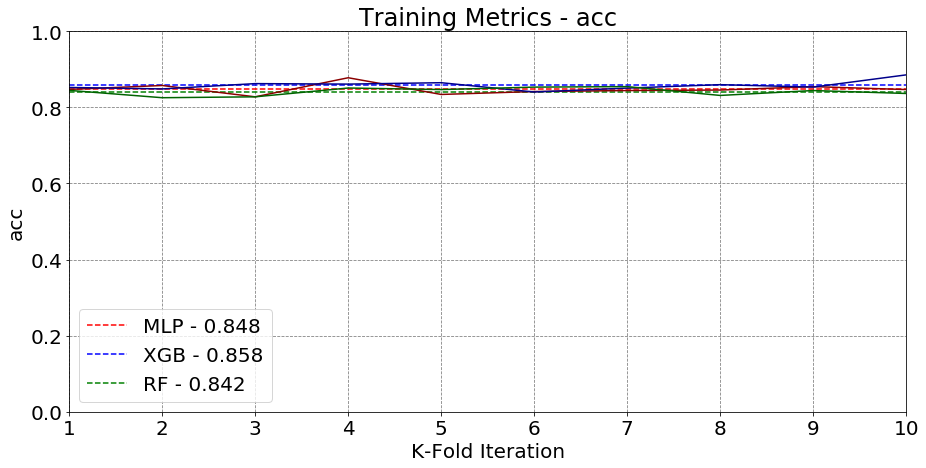

In [34]:
cplt.plot_training_results([mlp_metrics,xgb_metrics,rf_metrics],['MLP','XGB','RF'],style='acc')

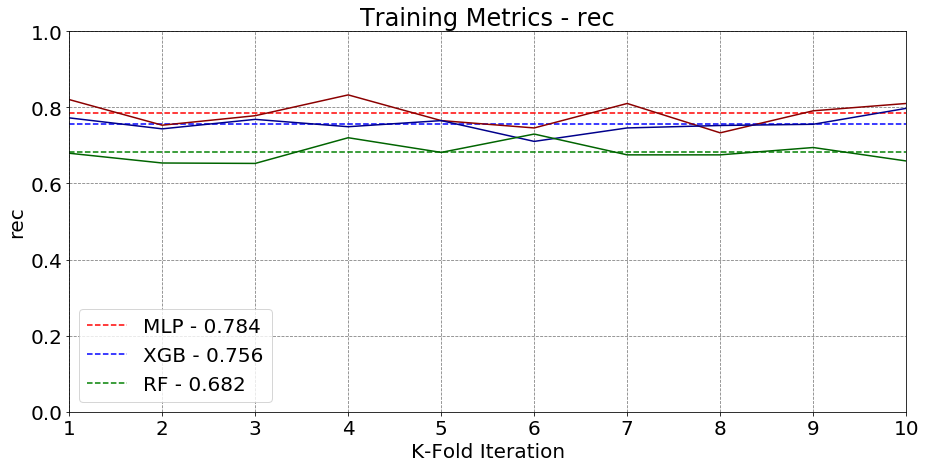

In [35]:
cplt.plot_training_results([mlp_metrics,xgb_metrics,rf_metrics],['MLP','XGB','RF'],style='rec')

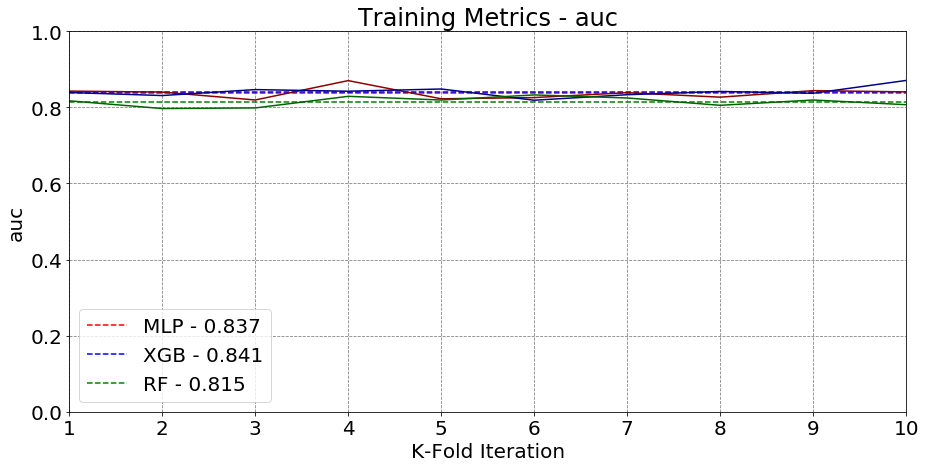

In [36]:
cplt.plot_training_results([mlp_metrics,xgb_metrics,rf_metrics],['MLP','XGB','RF'],style='auc')

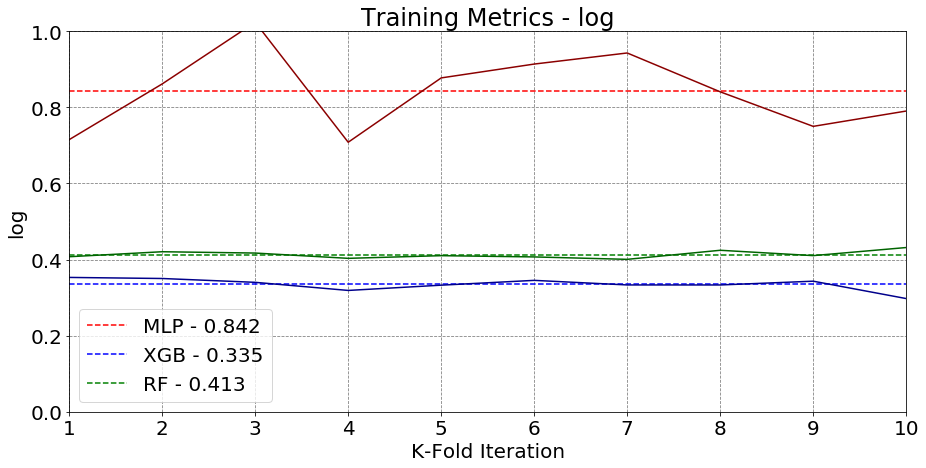

In [37]:
cplt.plot_training_results([mlp_metrics,xgb_metrics,rf_metrics],['MLP','XGB','RF'],style='log')